In [1]:
# 1. Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Fashion MNIST and preprocess
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [3]:
# Class names for display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Data pipeline
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64).prefetch(tf.data.AUTOTUNE)

In [5]:
# Build model
def build_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train
model.fit(train_ds, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7396 - loss: 0.7151
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8709 - loss: 0.3578
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8885 - loss: 0.3065
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8979 - loss: 0.2762
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9061 - loss: 0.2494


In [8]:
# Evaluate on test data
loss, acc = model.evaluate(test_ds)
print(f"✅ Final Test Accuracy: {acc:.4f}")
print(f"🧪 Final Test Loss: {loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9021 - loss: 0.2746
✅ Final Test Accuracy: 0.9017
🧪 Final Test Loss: 0.2702


In [9]:
# Save model
model.save("fashion_mnist_model.h5")

# Load saved model
loaded_model = tf.keras.models.load_model("fashion_mnist_model.h5")

# Evaluate loaded model
loss, acc = loaded_model.evaluate(test_ds)
print(f"✅ Loaded Model Accuracy: {acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9021 - loss: 0.2746
✅ Loaded Model Accuracy: 0.9017


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


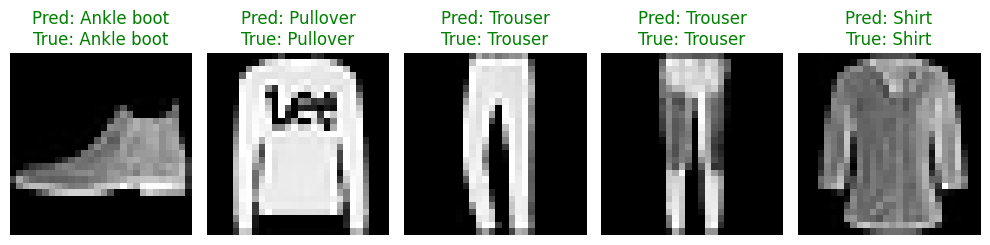

In [10]:
# Predict and visualize sample
num_samples = 5
sample_images = x_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = loaded_model.predict(sample_images)

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[sample_labels[i]]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
plt.tight_layout()
plt.show()